<a href="https://colab.research.google.com/github/RishabKr15/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name : Twitter Sentiment Analysis**

# **Contribution : Rishabh Kumar(Individual)**

# **Twitter Sentiment Analysis: Problem Statement**

In this project, we aim to develop a Natural Language Processing (NLP) model for Twitter sentiment analysis to address the challenges associated with sentiment classification of tweets. Given the short length, informal language, and context-specific nature of tweets, accurately determining sentiment remains a significant challenge. Our goal is to build a model that can classify tweets as either positive or negative based on their content.

To achieve this, we utilize the Twitter Dataset, which contains 1,600,000 tweets collected via the Twitter API. The dataset provides labeled tweets with various attributes that are essential for sentiment analysis:

* target: Indicates the sentiment of the tweet (positive or negative).

* ids: A unique identifier for each tweet.

* date: The timestamp of when the tweet was posted.

* flag: Represents a query (set as "NO QUERY" if no specific query exists).

* user: The username of the individual who posted the tweet.

* text: The actual content of the tweet.
Project Pipeline

To build an efficient sentiment classification model, we follow a structured machine learning pipeline consisting of:

* Importing Necessary Dependencies – Loading required libraries for text processing, data analysis, and model training.

* Reading and Loading the Dataset – Extracting and understanding the structure of the Twitter sentiment dataset.
* Exploratory Data Analysis (EDA) – Identifying trends, missing values, and sentiment distribution.
Data Visualization of Target Variables – Analyzing sentiment patterns using techniques like Word Clouds and bar charts.

* Data Preprocessing – Cleaning and transforming text by removing unnecessary characters, tokenizing, stemming, and stopword removal.

* Splitting the Dataset – Dividing the dataset into training and testing subsets to evaluate performance.
Transforming the Dataset using TF-IDF Vectorization – Converting raw text into a structured numerical format for model input.

* Function for Model Evaluation – Defining key metrics to assess the performance of our sentiment classifier.

* Model Building – Training a machine learning algorithm to classify tweets based on sentiment.

* Model Evaluation – Measuring accuracy and effectiveness using classification reports, accuracy scores, and confusion matrices.

By following this end-to-end NLP pipeline, we aim to develop a robust Twitter sentiment analysis model that can effectively classify tweets, providing valuable insights for brand monitoring, customer feedback analysis, and social media sentiment tracking.

Let’s get started! 🚀
As show in below image, we will be performing few text cleaning and model building techniques
    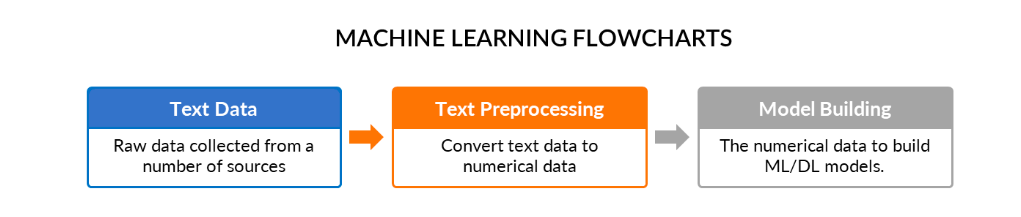
  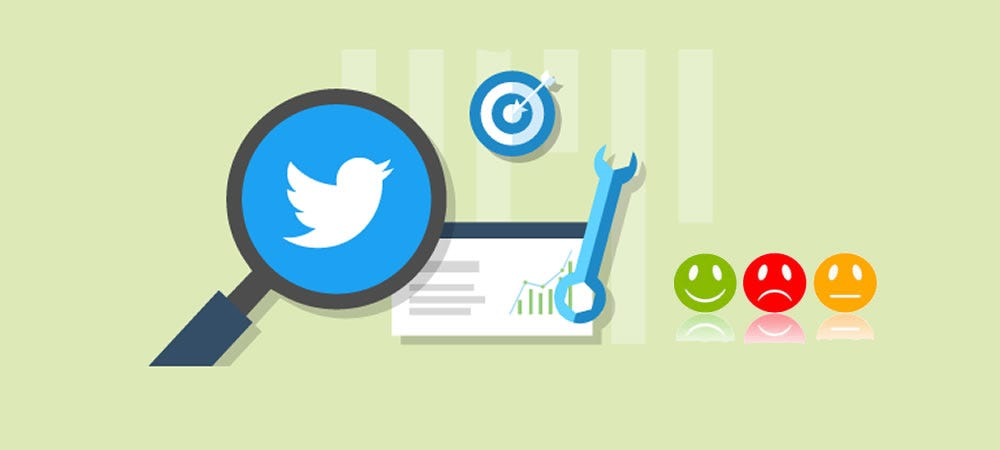


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Getting the current directory
import os
os.getcwd()

'/content'

In [3]:
#Changing the working directory to project folder
os.chdir('/content/drive/MyDrive/AlmaBetter')
os.getcwd()

'/content/drive/MyDrive/AlmaBetter'

# **Step-1: Importing the Necessary Dependencies**

In [4]:
import pandas as pd
import numpy as np
import re #used as a regular expression to find particular patterns and process it
import string #used to obtain information in the string and manipulate the string overall
import warnings
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Importing Twitter Dataset and basic checks**

In [5]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/twitter.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
1387023,4,2052893435,Sat Jun 06 02:26:29 PDT 2009,NO_QUERY,CharlotteMcFLY,"had a nice talk with deb on the phone, trying ..."
763525,0,2298408529,Tue Jun 23 11:38:28 PDT 2009,NO_QUERY,es_broma,going to the dmv in a little while. kinda sad ...
281390,0,1992313708,Mon Jun 01 08:33:02 PDT 2009,NO_QUERY,bouncewiggle,southern idaho smells funky http://loopt.us/V...
876919,4,1684849244,Sat May 02 22:14:11 PDT 2009,NO_QUERY,scottfaithfull,@zublime75 ooooh i am getting the jitters. i c...
793009,0,2326480972,Thu Jun 25 07:05:55 PDT 2009,NO_QUERY,katieeta,Gym ! Then Working eight hours so excited to ...


# **Step-3: Exploratory Data Analysis**

## 3.1: Five top records of data

In [6]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 3.2: Columns/features in data

In [7]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

## 3.3: Length of the dataset

In [8]:
print('Length of the data is : ',len(df))

Length of the data is :  1600000


## 3.4: Shape of data

In [9]:
df.shape

(1600000, 6)

## 3.5: Data information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## 3.6: Datatypes of all columns

In [11]:
df.dtypes

,0
target,int64
ids,int64
date,object
flag,object
user,object
text,object


## 3.7: Checking for null values

In [12]:
np.sum(df.isnull().any(axis=1))

0

## 3.8: Rows and columns in the dataset

In [13]:
print('Count of colums in the data is: ', len(df.columns))
print('Count of rows in the data is : ', len(df))

Count of colums in the data is:  6
Count of rows in the data is :  1600000


## 3.9: Checkinng unique target values

In [14]:
df['target'].unique()

array([0, 4])

## 3.10: Checking the number of target values

In [15]:
df['target'].nunique()

2

# **Step-4: Data Visualization of Target Variables**

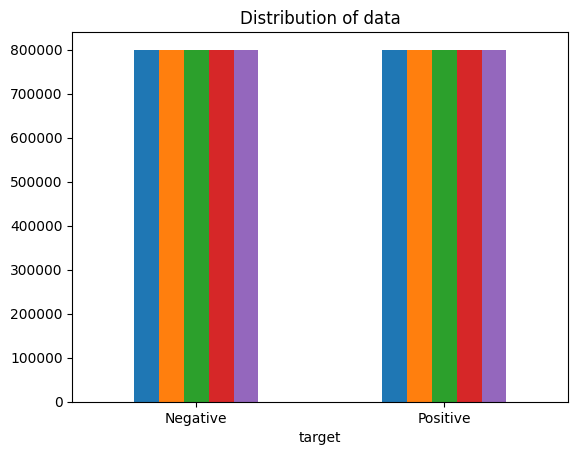

In [16]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind= 'bar', title = 'Distribution of data',legend = False)
ax.set_xticklabels(['Negative','Positive'], rotation = 0)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

In [17]:
df['target'].value_counts()

,count
target,
0,800000
4,800000


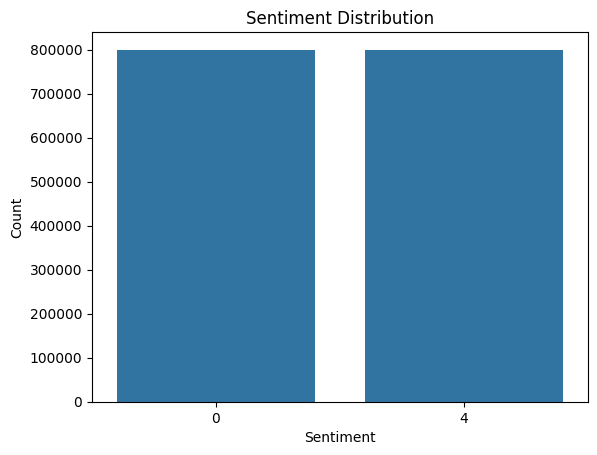

In [18]:
import seaborn as sns
sns.countplot(x=df['target'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# **Step-5: Data Preprocessing**

## 5.1: Selecting the text and Target column for our further analysis

In [19]:
data = df[['text','target']]

## 5.2: Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)

In [20]:
data['target'] = data['target'].replace(4,1)

## 5.3: Printing unique values of target variables

In [21]:
data['target'].unique()

array([0, 1])

## 5.4: Separating positive and negative tweets

In [22]:
data_pos = data[data['target']==1]
data_neg = data[data['target']==0]

## 5.5: Taking one-fourth of the data so we can run it on our machine easily

In [23]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

## 5.6: Combining positive and negative tweets

In [24]:
dataset = pd.concat([data_pos,data_neg])

## 5.7: Making statement text in lowercase

In [25]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'].tail()

,text
19995,"not much time off this weekend, work trip to m..."
19996,one more day of holidays
19997,feeling so down right now .. i hate you damn h...
19998,"geez,i hv to read the whole book of personalit..."
19999,i threw my sign at donnie and he bent over to ...


## 5.8: Defining set containing all stopwords in English

In [26]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

## 5.9: Cleaning and removing the above stop words list from the tweet text

In [27]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

,text
800000,love @health4uandpets u guys r best!!
800001,im meeting one besties tonight! cant wait!! - ...
800002,"@darealsunisakim thanks twitter add, sunisa! g..."
800003,sick really cheap hurts much eat real food plu...
800004,@lovesbrooklyn2 effect everyone


## 5.10: Cleaning and removing punctuations

In [28]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
  translator = str.maketrans('', '',punctuations_list)
  return text.translate(translator)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


## 5.11: Cleaning and removing repeating characters

In [29]:
def cleaning_repeating_char(text):
  return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


 **Breakdown of the Regex Pattern (.)\1+**
* (.) → Captures any character (. matches any single character).
* \1+ → Matches one or more occurrences of the same character captured in (.).
* r'\1' → Replaces the repeated sequence with just one instance of that character.

## 5.12: Cleaning and removing URLs

In [30]:
def cleaning_URLs(data):
  return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


**Breakdown of the Regex Pattern**


* (www\.[^\s]+)
*Matches URLs that start with "www."
* www\. → Matches "www." literally.
* [^\s]+ → Matches any non-space characters (\s represents whitespace, and *^\s means "not a space"), ensuring the rest of the URL is captured.

*(https?://[^\s]+)

* Matches URLs that start with "http://" or "https://".
* https?:// → Matches "http://" or "https://".
* [^\s]+ → Matches the rest of the URL until a space is encountered.

* ((www\.[^\s]+)|(https?://[^\s]+))

* The entire pattern is enclosed in () to capture either format (URLs starting with www. OR http/https).

* re.sub(..., ' ', data)

* Replaces the detected URLs with a space (' ') to clean the text.

## 5.13: Cleaning and removing numeric numbers

In [31]:
def cleaning_numbers(data):
  return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

,text
19995,not much time off weekend work trip malmï¿½ fr...
19996,one day holidays
19997,feeling right hate damn humprey
19998,geezi hv read whole book personality types emb...
19999,threw sign donnie bent over get but thingee ma...


## 5.14: Getting tokenization of tweet text

In [32]:
print(dataset['text'].head(10))  # Seeing actual text content
print(dataset['text'].apply(type).value_counts())  # Checking data types
print(dataset['text'].isnull().sum())  # Counting NaN values


800000                    love healthuandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                        lovesbrooklyn effect everyone
800005    productoffear tell burst laughing really loud ...
800006    rkeithhill thans response ihad already find an...
800007    keepinupwkris jealous hope great time vegas li...
800008    tommcfly ah congrats mr fletcher finally joini...
800009    evoip responded stupid cat helping type forgiv...
Name: text, dtype: object
text
<class 'str'>    40000
Name: count, dtype: int64
0


In [33]:
dataset['text'] = dataset['text'].astype(str).fillna('')


In [34]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

# Ensure text is properly formatted
dataset['text'] = dataset['text'].astype(str).fillna('')

# Apply tokenization directly
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

# Display output
print(dataset['text'].head(10))


800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
800005    [productoffear, tell, burst, laughing, really,...
800006    [rkeithhill, thans, response, ihad, already, f...
800007    [keepinupwkris, jealous, hope, great, time, ve...
800008    [tommcfly, ah, congrats, mr, fletcher, finally...
800009    [evoip, responded, stupid, cat, helping, type,...
Name: text, dtype: object


## 5.15: Applying stemming

In [35]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
  text = [st.stem(word) for word in data]
  return data
dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


## 5.15: Applying lemmatizer

In [36]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')  # Needed for WordNet lemmatization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [37]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
  text = [lm.lemmatize(word) for word in data]
  return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

,text
800000,"[love, healthuandpets, u, guys, r, best]"
800001,"[im, meeting, one, besties, tonight, cant, wai..."
800002,"[darealsunisakim, thanks, twitter, add, sunisa..."
800003,"[sick, really, cheap, hurts, much, eat, real, ..."
800004,"[lovesbrooklyn, effect, everyone]"


## 5.17: Separating input feature and label

In [40]:
X = data.text
y = data.target

## 5.18: Plot a cloud of words for negative tweets

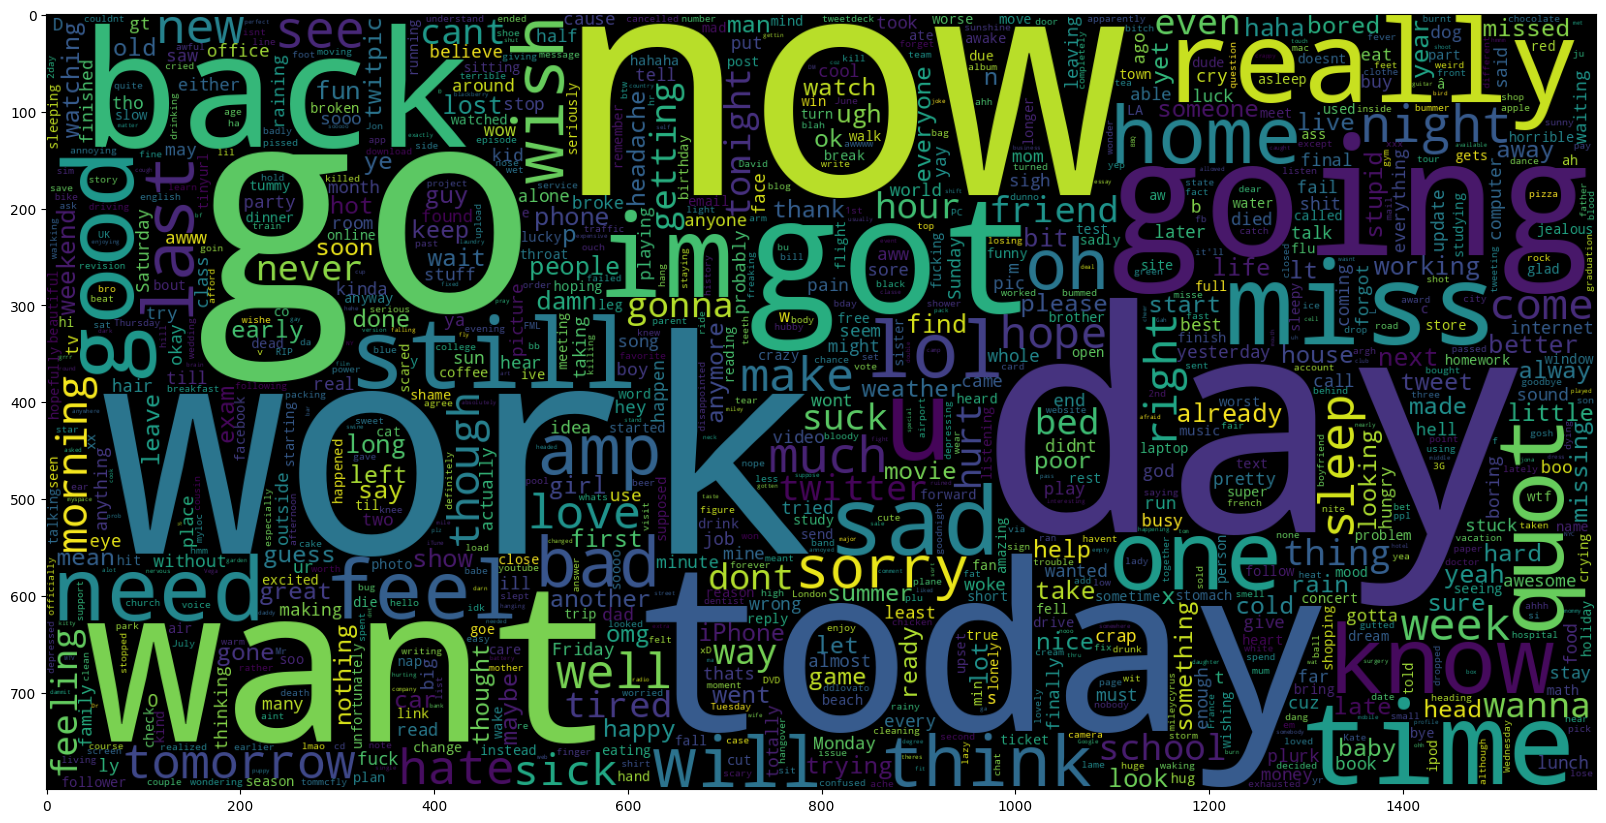

In [41]:
data_neg = data['text'][:800000]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800,
               collocations= False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

* The first 800,000 tweets are assumed to be negative (this assumption depends on how the dataset is structured).<br>
* A word cloud is generated to visualize the most frequently occurring words in negative tweets.

## 5.19: Ploting a cloud of words for positive tweets

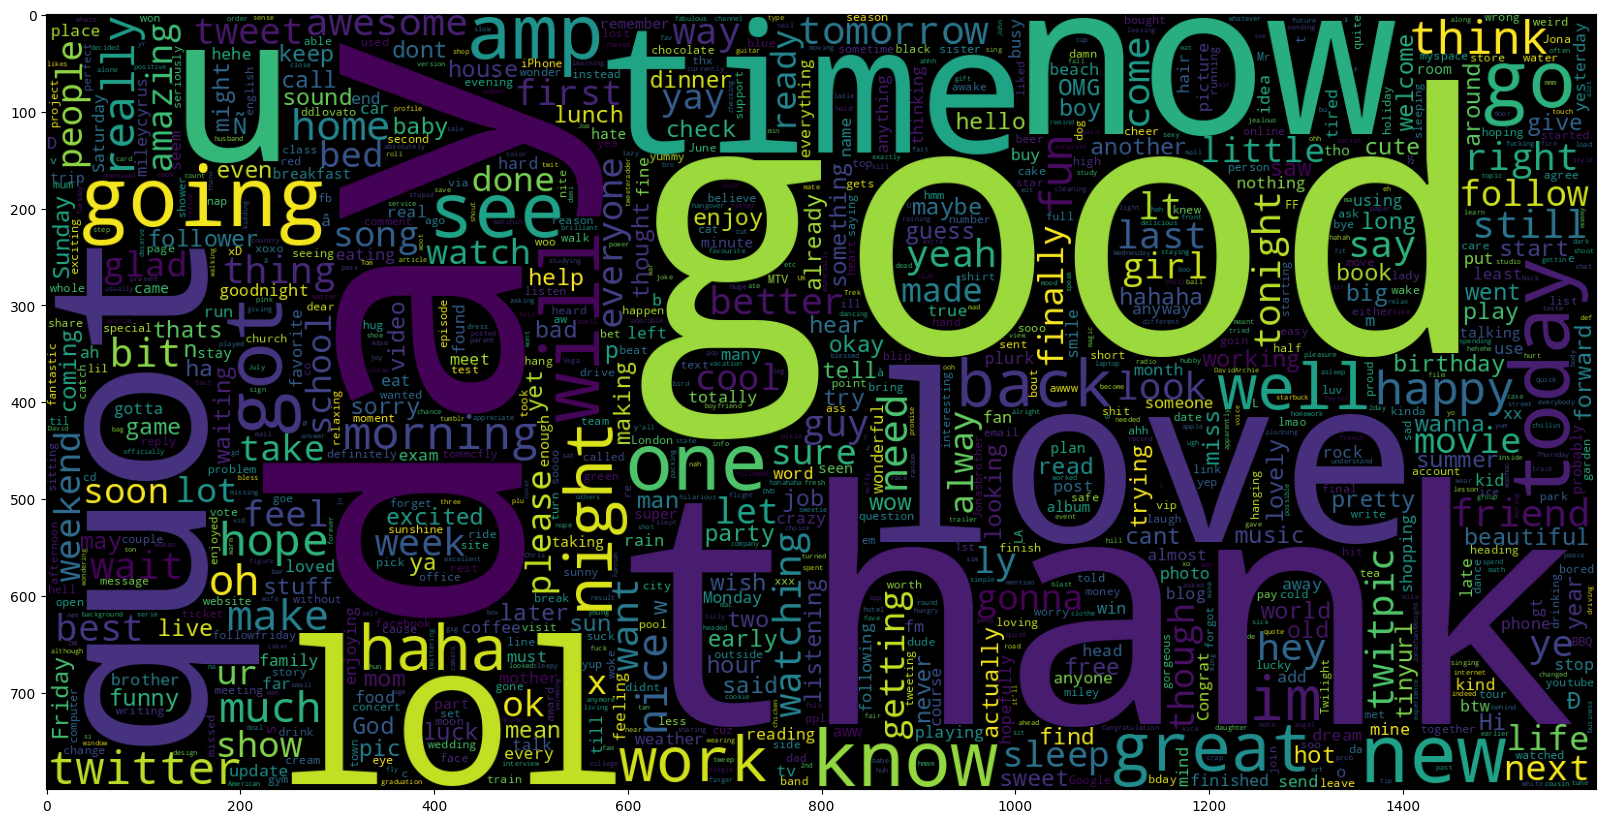

In [42]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words=1000, width= 1600, height=800,
               collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.show()

* The remaining tweets (from index 800,000 onward) are assumed to be positive.
* A word cloud is created for the most common words in positive tweets.


# **Step-6: Splitting Our Data Into Train and Test Subset**

In [43]:
# Separating the 95% data for training data and 5% for testing data
from sklearn.model_selection import train_test_split

# Define X (features) and y (target labels)
X = dataset['text']
y = dataset['target']
# Splitting the dataset (95% training, 5% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=26105111)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state= 26105111)
# Ensure X_train is a Pandas Series (or list of strings)
X_train = pd.Series(X_train)  # Converting list to Series
X_test = pd.Series(X_test)

# **Step-7: Transforming the Dataset Using TF-IDF Vectorization**

## 7.1: Fitting the TF-IDF Vectorizer

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train.astype(str))  # Ensuring all elements are strings

print('No. of feature_words:', len(vectoriser.get_feature_names_out()))


No. of feature_words: 251318


## 7.2: Transform the data using TF-IDF Vectorizer

In [45]:
X_train = vectoriser.transform(X_train.astype(str))
X_test  = vectoriser.transform(X_test.astype(str))

# **Step-8: Function for Model Evaluation**

After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively:

* Accuracy Score
* Confusion Matrix with Plot
* ROC-AUC Curve

In [46]:
def model_Evaluate(model):

# Predicting values for Test dataset
  y_pred = model.predict(X_test)
# Printing the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Computing and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# **Step-9: Model Building**

In the problem statement, we have used three different models respectively :

* Bernoulli Naive Bayes Classifier
* SVM (Support Vector Machine)
* Logistic Regression

The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models, and then try to find out the one which gives the best performance among them.

## 8.1: Model-1 : Bernoulli Naive Bayes model

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       991
           1       0.78      0.72      0.75      1009

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



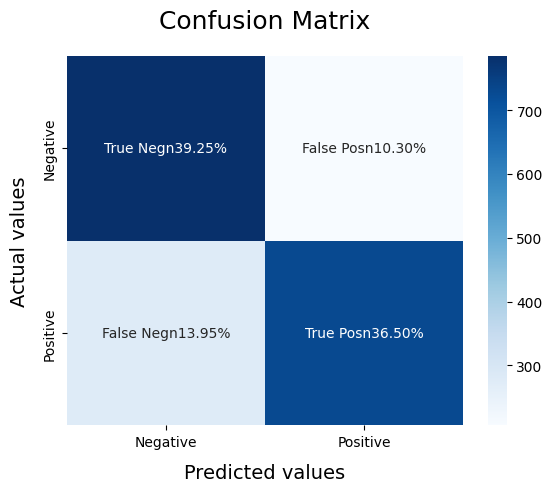

In [47]:
from sklearn.naive_bayes import BernoulliNB

# Initializing Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()

# Fixing the typo from X_tain to X_train
BNBmodel.fit(X_train, y_train)

# Evaluating the model (ensure model_Evaluate is defined)
model_Evaluate(BNBmodel)

# Making predictions
y_pred = BNBmodel.predict(X_test)


## 8.2: Ploting the ROC-AUC Curve for model-1

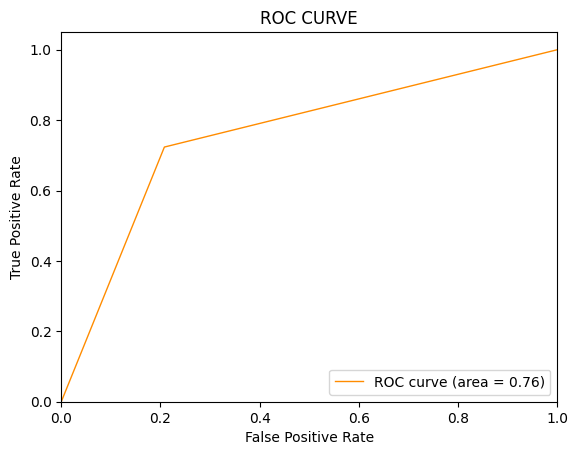

In [49]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 8.3: Model-2 : SVC model

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       991
           1       0.79      0.74      0.76      1009

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



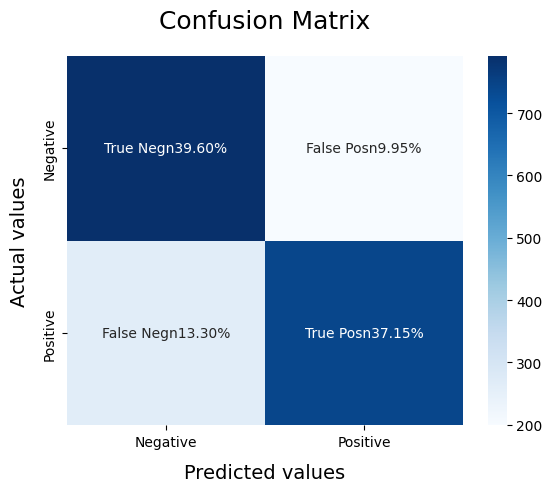

In [50]:
# Initializing SVC model
SVCmodel = LinearSVC()

# Fixing the typo from X_tain to X_train
SVCmodel.fit(X_train, y_train)

# Evaluating the model (ensure model_Evaluate is defined)
model_Evaluate(SVCmodel)

# Making predictions
y_pred = SVCmodel.predict(X_test)


## 8.4: Plot the ROC-AUC Curve for model-2

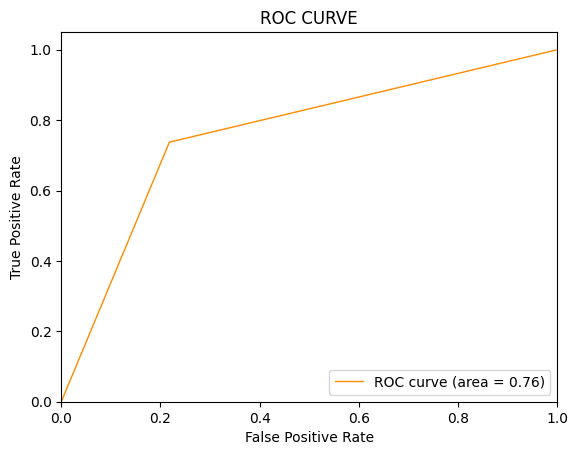

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## 8.5: Model-3 : Logistic Regression model

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       991
           1       0.78      0.74      0.76      1009

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



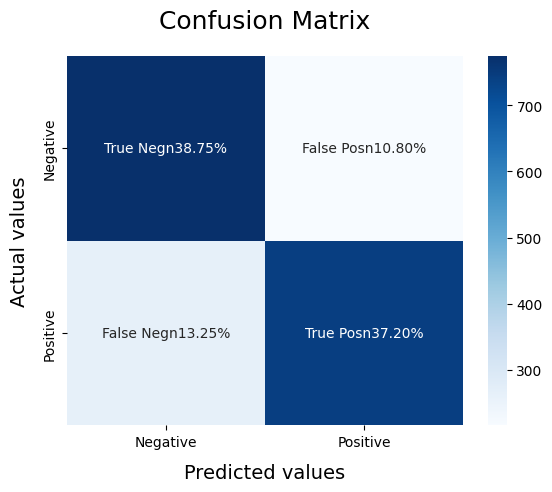

In [54]:
from sklearn.linear_model import LogisticRegression

# Initializing Logistic Regression model with correct parameter name
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

# Fixing the typo from X_tain to X_train
LRmodel.fit(X_train, y_train)

# Evaluating the model (ensure model_Evaluate is defined)
model_Evaluate(LRmodel)

# Making predictions
y_pred = LRmodel.predict(X_test)


## 8.6: Plotting the ROC-AUC Curve for model-3

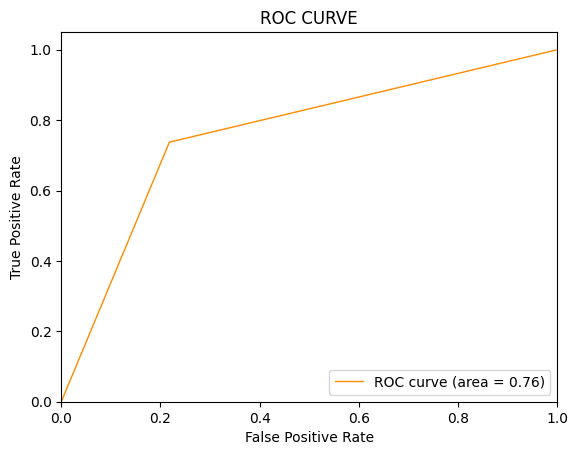

In [56]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **Step-10: Model Evaluation**

Upon evaluating all the models, we can conclude the following details i.e.

## **Model Performance Summary:**

##  **Model 1: Bernoulli Naive Bayes model**

* Accuracy: 76% <br>
* Precision: 0.74 (Negative), 0.78 (Positive) <br>
* Recall: 0.79 (Negative), 0.72 (Positive)  <br>
* F1-Score: 0.76 <br>

### **Observations:**

* Model 1 performs well, but the recall score for positive sentiment (0.72) is lower, meaning it misclassifies some positive tweets.<br>
* The precision-recall balance suggests it is slightly biased toward predicting negative sentiment correctly.

## **Model 2: SVC Model**
* Accuracy: 77% <br>
* Precision: 0.75 (Negative), 0.79 (Positive) <br>
* Recall: 0.80 (Negative), 0.74 (Positive)  <br>
* F1-Score: 0.77 <br>

  ### **Observations:**
* Model 2 outperforms Model 1 with higher recall for negative sentiment and slightly improved precision.<br>
* The balance between precision and recall is better, reducing false positives and negatives. <br>
* This model achieves the highest accuracy (77%), making it a strong candidate. <br>

## **Model 3: Logistic Regression model**
* Accuracy: 76% <br>
* Precision: 0.75 (Negative), 0.78 (Positive) <br>
* Recall: 0.78 (Negative), 0.74 (Positive) <br>
* F1-Score: 0.76 <br>

### **Observations:**
* Model 3 performs similarly to Model 1, with identical accuracy and F1-scores.<br>
* However, Model 3 has slightly more balance in predicting both classes compared to Model 1.

## **Final Conclusion:**
* Model 2 is the best-performing model, achieving the highest accuracy (77%) and F1-score (0.77), meaning it has the best balance between precision and recall. <br>
* Model 3 and Model 1 perform similarly, but Model 3 offers slightly more consistency in handling positive and negative tweets. <br>

## **Future Improvements:**
* Further tuning of hyperparameters and feature engineering to improve precision-recall balance.
Exploring deep learning models like BERT or LSTMs for improved text understanding. <br>

* Expanding the dataset to reduce misclassification and increase generalization. <br>
* **Overall, Model 2 is recommended for deployment, but future improvements can be made for better performance.**